In [ ]:
# to do: need to mske the dataframe go back further in time
# need to need to round up predictions at the end and add them together, but its okay if the model predicts floats, predicts stand for only an accident occuring not a 
# not a probabilty - the value it is, Classification gives back a probabilty, regression gives back the value it is
# change the rsme, is small since the values are small, its the amount away from the actual, the lower it is the better as it is closer to the data


In [31]:
import pandas as pd

#.venv\Scripts\activate.bat 

In [32]:
df = pd.read_csv('./regressionData.csv')
df.reset_index(inplace=True)
df

,index,accidentYear,longitude,latitude,AccidentSeverityDescription,accidentDate,DayOfWeekDescription,accidentTime,RoadTypeDescription,speedLimit,LightConditionsDescription,tavg,prcp,snow,wspd,month,rad_lng,rad_lat,cluster,Timestamp
0,0,2021,-0.092653,51.564307,Serious,05/11/2021,Friday,30:00.0,Single carriageway,30,Darkness - lights lit,4.8,0.0,0,10.0,11,-0.001617,0.899967,447,11/05/2021
1,1,2021,-0.167045,51.463795,Slight,07/11/2021,Sunday,15:00.0,Single carriageway,20,Daylight,8.4,0.0,0,16.9,11,-0.002915,0.898213,426,11/07/2021
2,2,2021,-0.101031,51.494435,Slight,07/11/2021,Sunday,25:00.0,One way street,20,Daylight,8.4,0.0,0,16.9,11,-0.001763,0.898747,0,11/07/2021
3,3,2021,-0.173222,51.482164,Slight,07/11/2021,Sunday,55:00.0,Single carriageway,20,Daylight,8.4,0.0,0,16.9,11,-0.003023,0.898533,1,11/07/2021
4,4,2021,-0.092673,51.494164,Fatal,07/11/2021,Sunday,50:00.0,Dual carriageway,20,Daylight,8.4,0.0,0,16.9,11,-0.001617,0.898743,2,11/07/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33257,33257,2021,-0.190872,51.501997,Slight,06/11/2021,Saturday,55:00.0,Single carriageway,20,Daylight,9.1,0.0,0,18.5,11,-0.003331,0.898879,150,11/06/2021
33258,33258,2021,-0.078663,51.523773,Slight,05/11/2021,Friday,00:00.0,One way street,20,Daylight,4.8,0.0,0,10.0,11,-0.001373,0.899259,19,11/05/2021
33259,33259,2021,-0.005719,51.535307,Slight,06/11/2021,Saturday,19:00.0,Dual carriageway,30,Darkness - lights lit,9.1,0.0,0,18.5,11,-0.000100,0.899461,125,11/06/2021
33260,33260,2021,-0.133984,51.510872,Slight,06/11/2021,Saturday,15:00.0,One way street,30,Darkness - lighting unknown,9.1,0.0,0,18.5,11,-0.002338,0.899034,167,11/06/2021


In [33]:
#filter the slight accidents 
filter_slight = df['AccidentSeverityDescription'] == 'Slight'
slight_series = df.where(filter_slight).groupby(['Timestamp', 'DayOfWeekDescription', 'tavg', 
'prcp', 'snow', 'wspd', 'cluster']).size().to_frame('number_slight_accidents')
#reset index to align dataframe
slight_df = pd.DataFrame(slight_series).reset_index()
#sort the dataframe to make it more readable
slight_df.sort_values(by=['Timestamp'], ascending=True).head(10)


,Timestamp,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_slight_accidents
0,01/01/2013,Tuesday,5.9,5.1,0.0,16.600000,53.0,1
1,01/01/2013,Tuesday,5.9,5.1,0.0,16.600000,130.0,1
2,01/01/2013,Tuesday,5.9,5.1,0.0,16.600000,242.0,1
3,01/01/2013,Tuesday,5.9,5.1,0.0,16.600000,251.0,1
4,01/01/2013,Tuesday,5.9,5.1,0.0,16.600000,272.0,1
13,01/01/2014,Wednesday,8.7,5.3,0.0,25.200001,445.0,1
12,01/01/2014,Wednesday,8.7,5.3,0.0,25.200001,310.0,1
11,01/01/2014,Wednesday,8.7,5.3,0.0,25.200001,308.0,1
9,01/01/2014,Wednesday,8.7,5.3,0.0,25.200001,120.0,1
10,01/01/2014,Wednesday,8.7,5.3,0.0,25.200001,229.0,1


In [34]:
#filter the Serious accidents
filter_serious = df['AccidentSeverityDescription'] == 'Serious'
serious_series = df.where(filter_serious).groupby(['Timestamp', 'DayOfWeekDescription', 'tavg', 
'prcp', 'snow', 'wspd', 'cluster']).size().to_frame('number_serious_accidents')
#reset index to align dataframe
serious_df = pd.DataFrame(serious_series).reset_index()
#sort the dataframe to make it more readable
serious_df.sort_values(by=['Timestamp'], ascending=True).head(10)

,Timestamp,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_serious_accidents
0,01/01/2013,Tuesday,5.9,5.1,0.0,16.600000,95.0,1
1,01/01/2014,Wednesday,8.7,5.3,0.0,25.200001,112.0,1
2,01/01/2017,Sunday,5.9,0.3,0.0,14.000000,19.0,1
3,01/01/2017,Sunday,5.9,0.3,0.0,14.000000,21.0,1
4,01/01/2017,Sunday,5.9,0.3,0.0,14.000000,198.0,1
5,01/01/2017,Sunday,5.9,0.3,0.0,14.000000,242.0,1
6,01/01/2017,Sunday,5.9,0.3,0.0,14.000000,423.0,1
7,01/01/2018,Monday,6.5,5.1,0.0,19.799999,136.0,1
8,01/01/2018,Monday,6.5,5.1,0.0,19.799999,187.0,1
9,01/01/2018,Monday,6.5,5.1,0.0,19.799999,410.0,1


In [35]:
#filter the fatal accidents
filter_fatal = df['AccidentSeverityDescription'] == 'Fatal'
fatal_series = df.where(filter_fatal).groupby(['Timestamp', 'DayOfWeekDescription',  'tavg', 
'prcp', 'snow', 'wspd', 'cluster']).size().to_frame('number_fatal_accidents')
#reset index to align dataframe
fatal_df = pd.DataFrame(fatal_series).reset_index()
#sort the dataframe to make it more readable
fatal_df.sort_values(by=['Timestamp'], ascending=True).head(10)

,Timestamp,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_fatal_accidents
0,01/04/2018,Thursday,8.0,4.3,0.0,24.799999,6.0,1
1,01/07/2019,Monday,7.2,0.0,0.0,13.700000,36.0,1
2,01/08/2020,Wednesday,10.0,0.3,0.0,13.000000,112.0,1
3,01/10/2016,Sunday,6.1,10.9,0.0,15.500000,80.0,1
4,01/11/2015,Sunday,5.7,0.8,0.0,22.900000,5.0,1
5,01/11/2015,Sunday,5.7,0.8,0.0,22.900000,63.0,1
6,01/11/2015,Sunday,5.7,0.8,0.0,22.900000,305.0,1
7,01/12/2013,Saturday,3.4,0.0,0.0,19.299999,239.0,1
8,02/03/2016,Wednesday,4.9,0.3,0.0,18.500000,421.0,1
9,02/05/2016,Friday,10.2,0.0,0.0,21.400000,0.0,1


In [36]:
merged_df = pd.merge(serious_df, slight_df, how='outer').sort_values(by=['Timestamp'], ascending=True)
merged_df.head(10)

,Timestamp,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_serious_accidents,number_slight_accidents
0,01/01/2013,Tuesday,5.9,5.1,0.0,16.600000,95.0,1.0,NaN
3742,01/01/2013,Tuesday,5.9,5.1,0.0,16.600000,53.0,NaN,1.0
3743,01/01/2013,Tuesday,5.9,5.1,0.0,16.600000,130.0,NaN,1.0
3744,01/01/2013,Tuesday,5.9,5.1,0.0,16.600000,242.0,NaN,1.0
3745,01/01/2013,Tuesday,5.9,5.1,0.0,16.600000,251.0,NaN,1.0
3746,01/01/2013,Tuesday,5.9,5.1,0.0,16.600000,272.0,NaN,1.0
3754,01/01/2014,Wednesday,8.7,5.3,0.0,25.200001,310.0,NaN,1.0
3753,01/01/2014,Wednesday,8.7,5.3,0.0,25.200001,308.0,NaN,1.0
3752,01/01/2014,Wednesday,8.7,5.3,0.0,25.200001,229.0,NaN,1.0
3751,01/01/2014,Wednesday,8.7,5.3,0.0,25.200001,120.0,NaN,1.0


In [37]:
accidents_df = pd.merge(merged_df, fatal_df, how='outer').sort_values(by=['Timestamp'], ascending=True)
accidents_df.head(10)

,Timestamp,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_serious_accidents,number_slight_accidents,number_fatal_accidents
0,01/01/2013,Tuesday,5.9,5.1,0.0,16.600000,95.0,1.0,NaN,NaN
1,01/01/2013,Tuesday,5.9,5.1,0.0,16.600000,53.0,NaN,1.0,NaN
2,01/01/2013,Tuesday,5.9,5.1,0.0,16.600000,130.0,NaN,1.0,NaN
3,01/01/2013,Tuesday,5.9,5.1,0.0,16.600000,242.0,NaN,1.0,NaN
4,01/01/2013,Tuesday,5.9,5.1,0.0,16.600000,251.0,NaN,1.0,NaN
5,01/01/2013,Tuesday,5.9,5.1,0.0,16.600000,272.0,NaN,1.0,NaN
15,01/01/2014,Wednesday,8.7,5.3,0.0,25.200001,79.0,NaN,1.0,NaN
14,01/01/2014,Wednesday,8.7,5.3,0.0,25.200001,112.0,1.0,NaN,NaN
13,01/01/2014,Wednesday,8.7,5.3,0.0,25.200001,7.0,NaN,1.0,NaN
12,01/01/2014,Wednesday,8.7,5.3,0.0,25.200001,445.0,NaN,1.0,NaN


In [38]:
#fill the NaN accident values with 0 and set the number to a int32
accidents_df['number_serious_accidents'].fillna(value=0, inplace=True)
accidents_df['number_serious_accidents'] = accidents_df['number_serious_accidents'].astype('int32')
accidents_df['number_slight_accidents'].fillna(value=0, inplace=True)
accidents_df['number_slight_accidents'] = accidents_df['number_slight_accidents'].astype('int32')
accidents_df['number_fatal_accidents'].fillna(value=0, inplace=True)
accidents_df['number_fatal_accidents'] = accidents_df['number_fatal_accidents'].astype('int32')

In [39]:
new_df = accidents_df.drop(['Timestamp'], axis=1)
new_df.head(10)

,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_serious_accidents,number_slight_accidents,number_fatal_accidents
0,Tuesday,5.9,5.1,0.0,16.600000,95.0,1,0,0
1,Tuesday,5.9,5.1,0.0,16.600000,53.0,0,1,0
2,Tuesday,5.9,5.1,0.0,16.600000,130.0,0,1,0
3,Tuesday,5.9,5.1,0.0,16.600000,242.0,0,1,0
4,Tuesday,5.9,5.1,0.0,16.600000,251.0,0,1,0
5,Tuesday,5.9,5.1,0.0,16.600000,272.0,0,1,0
15,Wednesday,8.7,5.3,0.0,25.200001,79.0,0,1,0
14,Wednesday,8.7,5.3,0.0,25.200001,112.0,1,0,0
13,Wednesday,8.7,5.3,0.0,25.200001,7.0,0,1,0
12,Wednesday,8.7,5.3,0.0,25.200001,445.0,0,1,0


In [40]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

#prepare the training test splitting 
#as this is a multi output
y = new_df[['number_serious_accidents', 'number_slight_accidents', 'number_fatal_accidents']]
X = new_df.drop(['number_serious_accidents', 'number_slight_accidents', 'number_fatal_accidents'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


In [41]:
X.head(10)

,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster
0,Tuesday,5.9,5.1,0.0,16.600000,95.0
1,Tuesday,5.9,5.1,0.0,16.600000,53.0
2,Tuesday,5.9,5.1,0.0,16.600000,130.0
3,Tuesday,5.9,5.1,0.0,16.600000,242.0
4,Tuesday,5.9,5.1,0.0,16.600000,251.0
5,Tuesday,5.9,5.1,0.0,16.600000,272.0
15,Wednesday,8.7,5.3,0.0,25.200001,79.0
14,Wednesday,8.7,5.3,0.0,25.200001,112.0
13,Wednesday,8.7,5.3,0.0,25.200001,7.0
12,Wednesday,8.7,5.3,0.0,25.200001,445.0


In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#prepare the data for the pipeline by one hot encoding the categorical values
enc = OneHotEncoder()
Values = [['Monday', 0], ['Tuesday', 1], ['Wednesday', 2], ['Thursday', 3], ['Friday', 4], ['Saturday', 5], ['Sunday', 6]  ]
enc.fit(Values)

#build preprocessing column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', enc, ['DayOfWeekDescription'])
    ], remainder ='passthrough'
)

#fit the preporcessing column transformer
result = preprocessor.fit_transform(X)
result = pd.DataFrame(result)

#rename by index
result = result.rename(columns ={result.columns[0]: 'col_0_Monday', result.columns[1]: 'col_1_Tuesday', result.columns[2]: 'col_2_Wednesday', 
                        result.columns[3]: 'col_3_Thursday', result.columns[4]: 'col_4_Friday', result.columns[5]: 'col_5_Saturday', 
                        result.columns[6]: 'col_6_Sunday' })
result

,col_0_Monday,col_1_Tuesday,col_2_Wednesday,col_3_Thursday,col_4_Friday,col_5_Saturday,col_6_Sunday,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.9,5.1,0.0,16.6,95.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.9,5.1,0.0,16.6,53.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.9,5.1,0.0,16.6,130.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.9,5.1,0.0,16.6,242.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.9,5.1,0.0,16.6,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32731,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,11.0,309.0
32732,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.9,0.0,0.0,8.5,85.0
32733,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.9,0.0,0.0,8.5,29.0
32734,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.9,0.0,0.0,8.5,93.0


In [43]:
x_test.head()

,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster
22961,Wednesday,7.300000,0.0,0.0,16.799999,56.0
15858,Thursday,16.799999,11.7,0.0,20.600000,144.0
6773,Saturday,21.000000,0.0,0.0,11.600000,226.0
21913,Wednesday,4.500000,0.0,0.0,12.300000,227.0
10139,Tuesday,16.299999,0.0,0.0,12.100000,269.0


<AxesSubplot: >

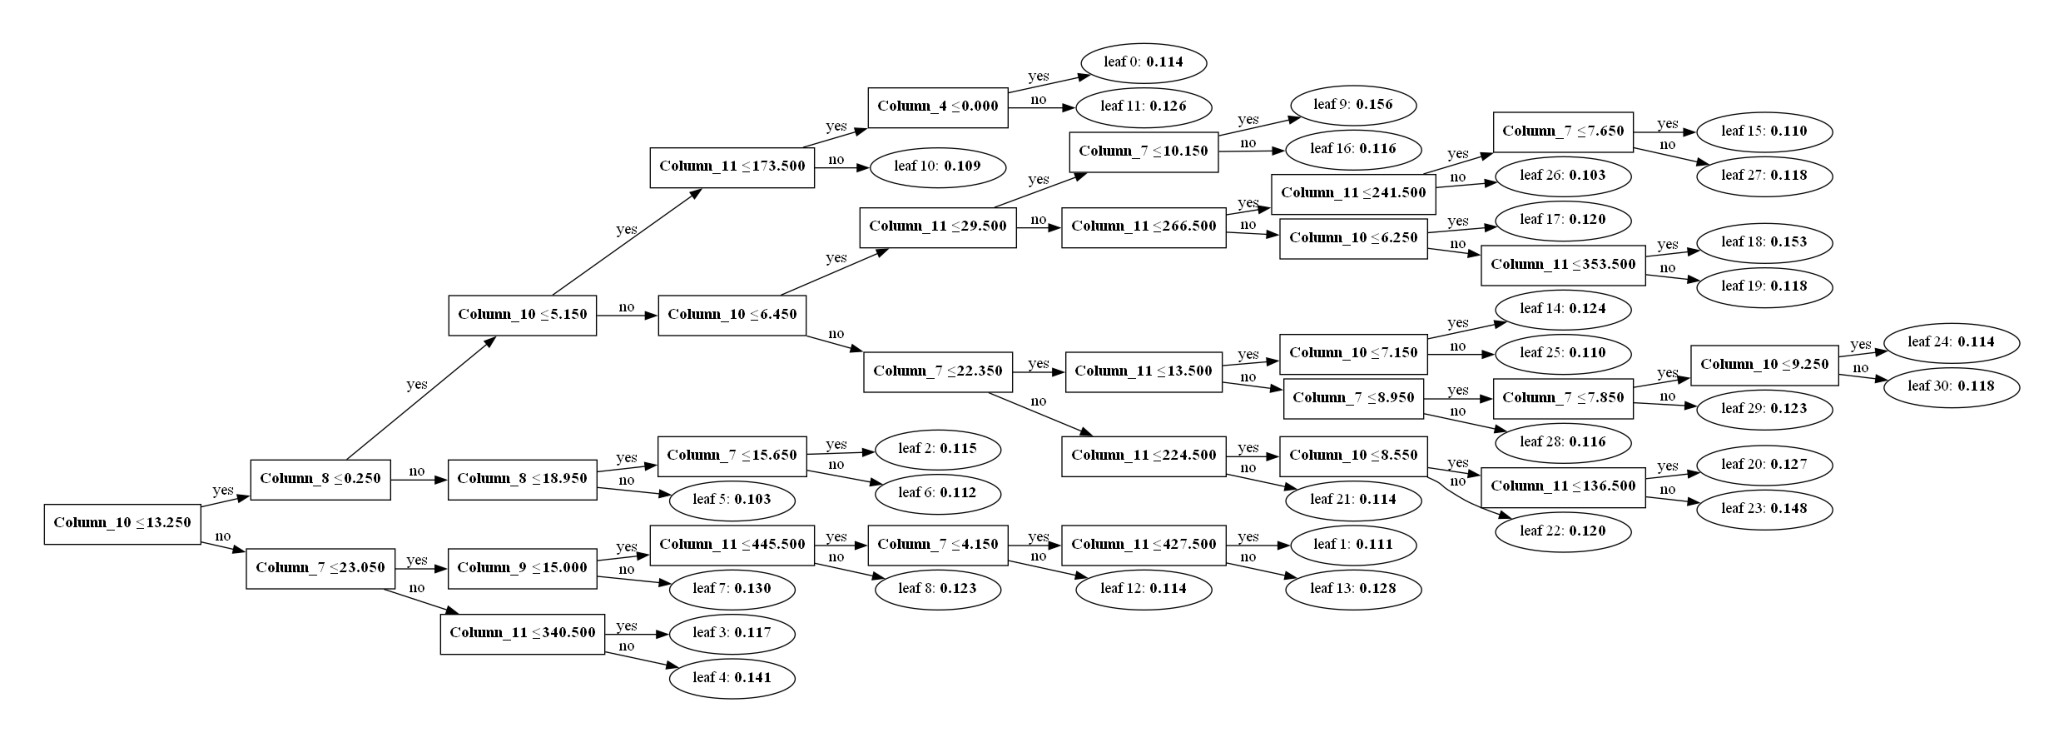

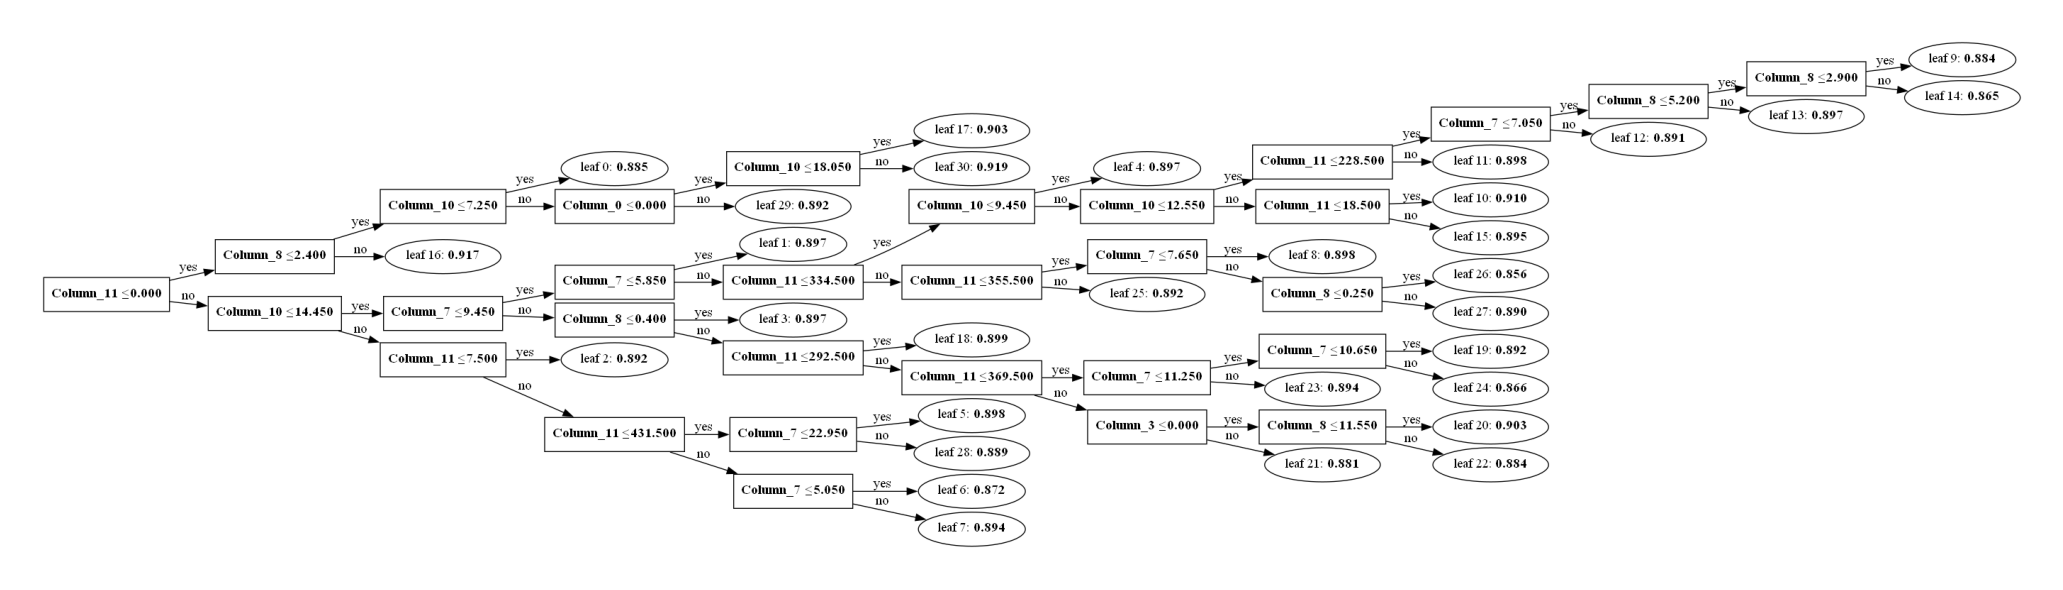

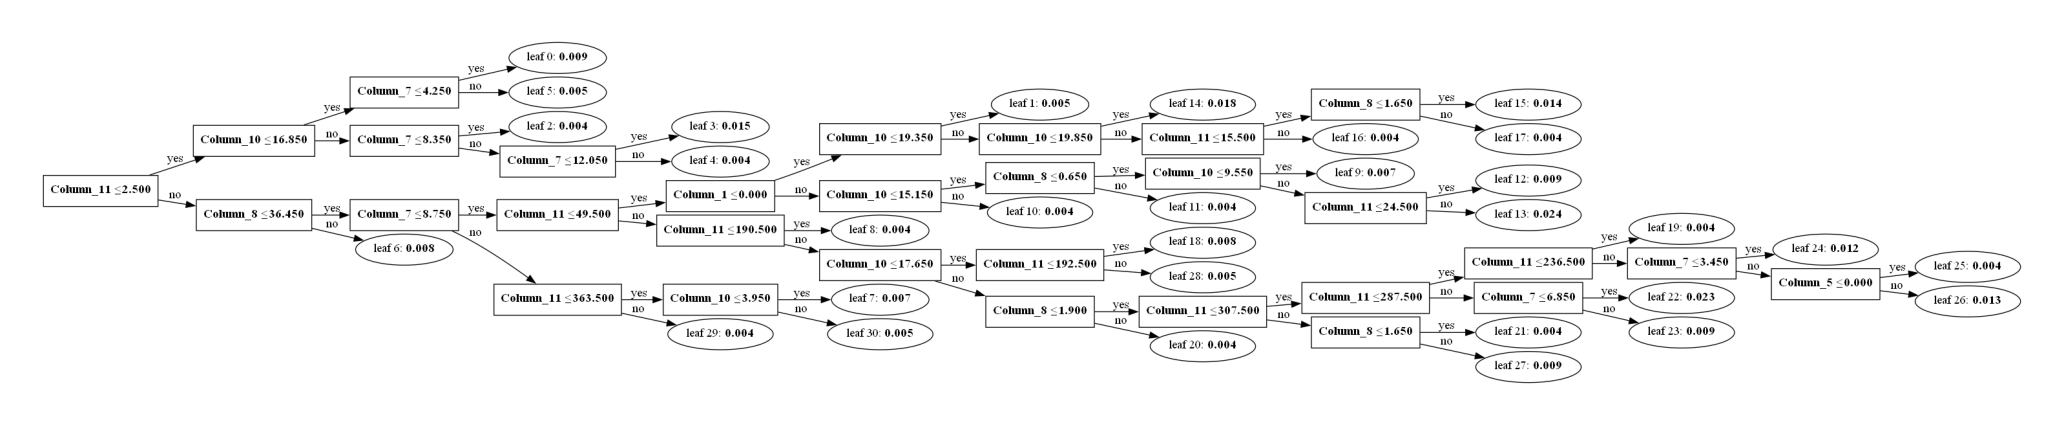

In [44]:
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor

#Data set is not very large, containing 33262 rows, so we need to set an appropriate min_data_in_leaf, lets try 1000
#to get better accuracy use a large number of leaves, be careful as this can cause overfitting, the default is 31
#Use large max_bin (may be slower) deafult is 255
#lower the default learning rate (0.1) and increase the default number of iterations (100) to get better accuracy
#Try dart (Dropouts meet Multiple Additive Regression Trees) for better accuracy 
#https://lightgbm.readthedocs.io/en/latest/Parameters.html
#https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
#https://lightgbm.readthedocs.io/en/v3.3.2/Parameters-Tuning.html

model = MultiOutputRegressor(LGBMRegressor(boosting_type='gbdt',  learning_rate=0.1))


pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', model)
])
#fit the pipeline
pipeline.fit(x_train, y_train.to_numpy())

#test the pipeline
test_result = pipeline.predict(x_test)

model = pipeline.named_steps['model']

predictions = pd.DataFrame(test_result, columns=['number_serious_accidents', 'number_slight_accidents', 'number_fatal_accidents'])
predictions.head()
plot_tree(model.estimators_[0],dpi=400)
plot_tree(model.estimators_[1],dpi=400)
plot_tree(model.estimators_[2],dpi=400)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

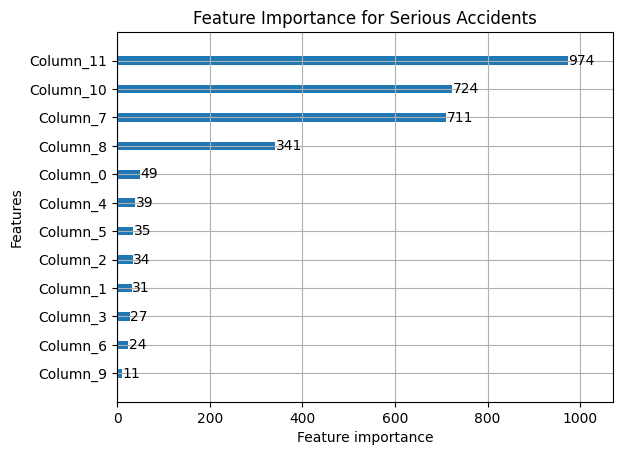

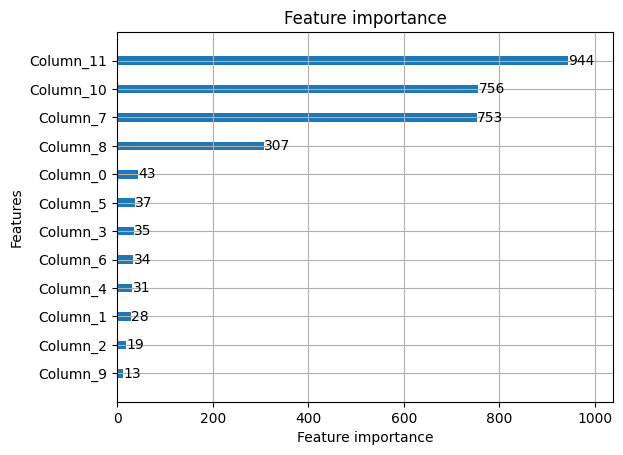

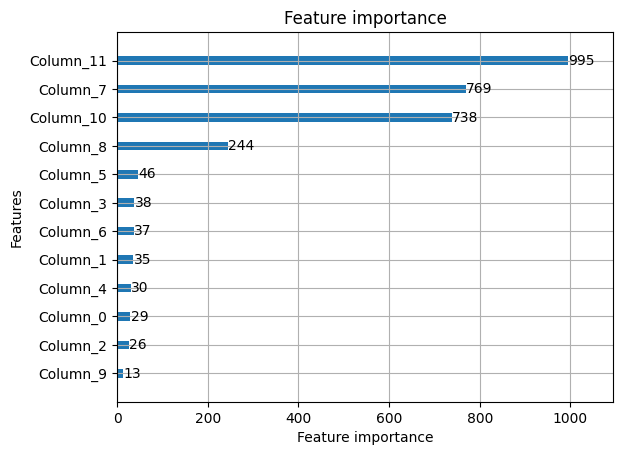

In [45]:
import matplotlib
from lightgbm import plot_importance

plot_importance(model.estimators_[0],height=0.3, title = 'Feature Importance for Serious Accidents')
plot_importance(model.estimators_[1],height=0.3)
plot_importance(model.estimators_[2],height=0.3)



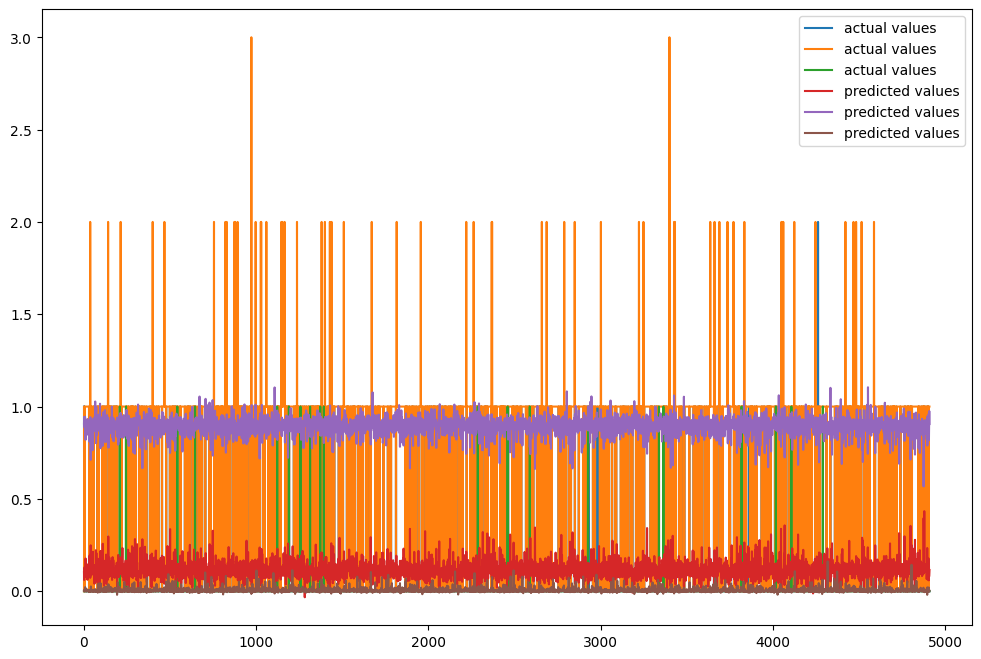

In [46]:
# importing the module
import matplotlib.pyplot as plt
# figure size
plt.figure(figsize=(12, 8))
# acutal values
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
# predicted values
plt.plot([i for i in range(len(y_test))],test_result, label="predicted values")
plt.legend()
plt.show()

In [47]:
#importing the r-square score
from sklearn.metrics import r2_score
# calculating the r score 
print('R score is :', r2_score(y_test, test_result))

R score is : -0.019337186971821813


In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from numpy import arange
from sklearn.metrics import get_scorer_names

get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [49]:
Input = result
Output = new_df[['number_slight_accidents']]


In [62]:
# function for the validation of model
def evaluate_model(model, Input, Ouput):
    
    # defining the method of validation
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3)
    
    
    # validating the model based on the accurasy score
    r_square = cross_val_score(model, Input, Ouput, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    
#     returning the accuracy score
    return r_square

In [67]:

#Data set is not very large, containing 33262 rows, so we need to set an appropriate min_data_in_leaf, lets try 1000
#to get better accuracy use a large number of leaves, be careful as this can cause overfitting, the default is 31
#Use large max_bin (may be slower) deafult is 255
#lower the default learning rate (0.1) and increase the default number of iterations (100) to get better accuracy
#Try dart (Dropouts meet Multiple Additive Regression Trees) for better accuracy 
#https://lightgbm.readthedocs.io/en/latest/Parameters.html
#https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
#https://lightgbm.readthedocs.io/en/v3.3.2/Parameters-Tuning.html


# fuction to create models
def build_models():
    
#     dic of models
    models = dict()
    
    # number of decision stumps
    num_leaves = [10, 20, 50, 100, 500, 1000, 1500]
        
#    using for loop to iterate though trees
    for i in num_leaves:
        
#         building model with specified trees
        models[str(i)] = lgb.LGBMRegressor(num_leaves=i)
    
#     returning the model
    return models

In [68]:
# calling the build_models function
models = build_models()
# creating list
results, names = list(), list()
# using for loop to iterate thoug the models
for name, model in models.items():
    
    # calling the validation function
    R_square = evaluate_model(model, Input, Output)
    
    # appending the accuray socres in results
    results.append(R_square)
    names.append(name)
    
    
    # printing the accuracy score
    print('num_leaves (%s)---R-square( %.5f)' % (name, R_square.mean()))

num_leaves (10)---R-square( -0.34479)
num_leaves (20)---R-square( -0.34602)
num_leaves (50)---R-square( -0.34856)
num_leaves (100)---R-square( -0.35306)
num_leaves (500)---R-square( -0.37607)
num_leaves (1000)---R-square( -0.37907)
num_leaves (1500)---R-square( -0.37883)


In [65]:
# creating the function 
def build_models():
    
#     creating dic of models
    models = dict()
    #min leaf data
    minLeafData = [1000, 2000, 5000, 10000]
    # explore features numbers from 1-5
    for i in minLeafData:
        
#         appending the models
        models[str(i)] = lgb.LGBMRegressor(min_data_in_leaf=i)
    
#     returining the models
    return models

In [66]:
# calling the function
models = build_models()
# creating the list
results, names = list(), list()
# for loop to iterate through the models
for name, model in models.items():
    
    
    # calling the evaluting function
    R_square = evaluate_model(model, Input, Output)
    
#     storing the accurcy
    results.append(R_square)
    names.append(name)
    
#     printing
    print('---->Min Leaf Data(%s)---R_square( %.5f)' % (name, R_square.mean()))

---->Min Leaf Data(1000)---R_square( -0.34445)
---->Min Leaf Data(2000)---R_square( -0.34390)
---->Min Leaf Data(5000)---R_square( -0.34364)
---->Min Leaf Data(10000)---R_square( -0.34368)


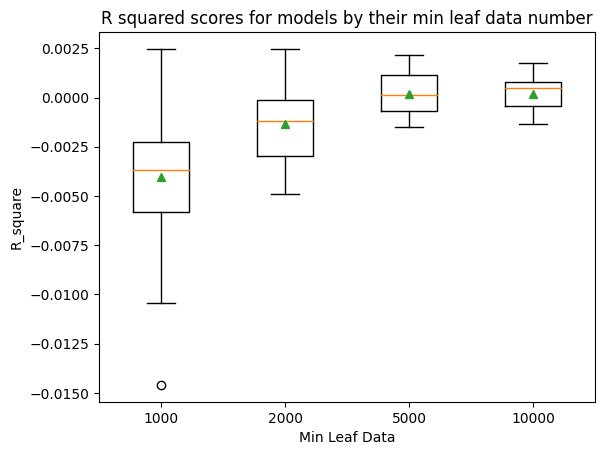

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)
# showing the plot
plt.title('R squared scores for models by their min leaf data number')
plt.xlabel('Min Leaf Data')
plt.ylabel('R_square')

plt.show()

In [ ]:
# fuction to create models
def build_models():
    
#     dic of models
    models = dict()
    
    # number of decision stumps
    boosting_method= ['gbdt', 'dart']
        
#    using for loop to iterate though trees
    for i in boosting_method:
        
#         building model with specified trees
        models[str(i)] = lgb.LGBMRegressor(boosting_type=i)
    
#     returning the model
    return models

In [ ]:
# calling the function
models = build_models()
# creating the list
results, names = list(), list()
# for loop to iterate through the models
for name, model in models.items():
    
    
    # calling the evaluting function
    R_square = evaluate_model(model, Input, Output)
    
#     storing the accurcy
    results.append(R_square)
    names.append(name)
    
#     printing
    print('---->Boosting type(%s)---R_square( %.5f)' % (name, R_square.mean()))

c:\Users\alex\Desktop\Fiona\Neuer Ordner\.venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\alex\Desktop\Fiona\Neuer Ordner\.venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\alex\Desktop\Fiona\Neuer Ordner\.venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


---->Boosting type(gbdt)---R_square( -0.01084)


c:\Users\alex\Desktop\Fiona\Neuer Ordner\.venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\alex\Desktop\Fiona\Neuer Ordner\.venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\alex\Desktop\Fiona\Neuer Ordner\.venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


---->Boosting type(dart)---R_square( -0.07227)


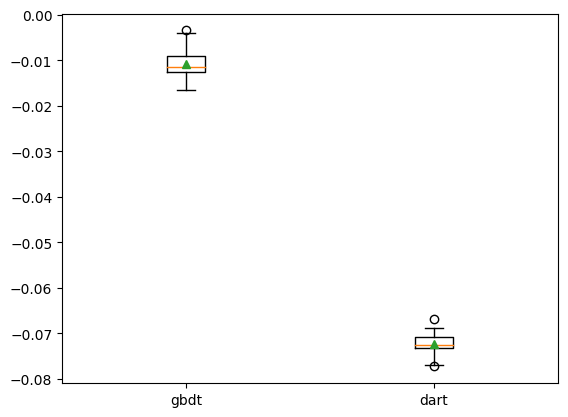

In [ ]:
# plotting box plot of the 
plt.boxplot(results, labels=names,showmeans=True)
# showing the plot
plt.show()

In [ ]:
#from lightgbm import create_tree_digraph
#create_tree_digraph(model.estimators_[0])

In [ ]:
from lightgbm import plot_metric
asd = model.estimators_[0]
plot_metric(model.estimators_[0])

AttributeError: 'LGBMRegressor' object has no attribute 'estimators_'

In [ ]:
#remodel the predictions dataframe by resetting index so that it merges with the predictions features
x_test.reset_index(inplace=True)
x_test.head()

,index,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster
0,18811,Wednesday,17.600000,0.0,0.0,13.5,205.0
1,7212,Thursday,18.700001,0.0,0.0,10.0,68.0
2,2470,Thursday,7.500000,1.5,0.0,25.5,257.0
3,30040,Wednesday,-1.000000,0.0,0.0,3.0,100.0
4,25672,Friday,14.800000,1.8,0.0,11.0,77.0


In [ ]:
merged_test_prediction_df = pd.concat([x_test, predictions], axis=1)
merged_test_prediction_df.head()

,index,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_serious_accidents,number_slight_accidents,number_fatal_accidents
0,18811,Wednesday,17.600000,0.0,0.0,13.5,205.0,0.138323,0.906433,0.004330
1,7212,Thursday,18.700001,0.0,0.0,10.0,68.0,0.133847,0.894014,0.007476
2,2470,Thursday,7.500000,1.5,0.0,25.5,257.0,0.061539,0.948318,-0.000730
3,30040,Wednesday,-1.000000,0.0,0.0,3.0,100.0,0.128673,0.899444,-0.004332
4,25672,Friday,14.800000,1.8,0.0,11.0,77.0,0.100397,0.925410,0.001460


In [ ]:
merged_test_prediction_df['number_serious_accidents'] = merged_test_prediction_df['number_serious_accidents'].round().astype(int)
merged_test_prediction_df['number_slight_accidents'] = merged_test_prediction_df['number_slight_accidents'].round().astype(int)
merged_test_prediction_df['number_fatal_accidents'] = merged_test_prediction_df['number_fatal_accidents'].round().astype(int)
merged_test_prediction_df.head()

,index,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_serious_accidents,number_slight_accidents,number_fatal_accidents
0,18811,Wednesday,17.600000,0.0,0.0,13.5,205.0,0,1,0
1,7212,Thursday,18.700001,0.0,0.0,10.0,68.0,0,1,0
2,2470,Thursday,7.500000,1.5,0.0,25.5,257.0,0,1,0
3,30040,Wednesday,-1.000000,0.0,0.0,3.0,100.0,0,1,0
4,25672,Friday,14.800000,1.8,0.0,11.0,77.0,0,1,0


In [ ]:
#compute the mse error for both columns
mse_serious_accidents = mean_squared_error(merged_test_prediction_df['number_serious_accidents'].to_numpy(), y_test['number_serious_accidents'].to_numpy())
mse_slight_accidents = mean_squared_error(merged_test_prediction_df['number_slight_accidents'].to_numpy(), y_test['number_slight_accidents'].to_numpy())
mse_fatal_accidents = mean_squared_error(merged_test_prediction_df['number_fatal_accidents'].to_numpy(), y_test['number_fatal_accidents'].to_numpy())

print('MSE for serious accidents {}, MSE for slight accidents {}, MSE for fatal accidents {}'.format(mse_serious_accidents, mse_slight_accidents, mse_fatal_accidents))

MSE for serious accidents 0.11545510079413561, MSE for slight accidents 0.12930156790877623, MSE for fatal accidents 0.005497861942577886


In [ ]:
for cluster_num in merged_test_prediction_df['cluster'].unique():
    cluster_filter = df['cluster'] == cluster_num
    merged_test_prediction_df.loc[merged_test_prediction_df['cluster'] == cluster_num, 'longitude'] = df.where(cluster_filter)['longitude'].mean()
    merged_test_prediction_df.loc[merged_test_prediction_df['cluster'] == cluster_num, 'latitude'] = df.where(cluster_filter)['latitude'].mean()

In [ ]:
merged_test_prediction_df.head()

,index,DayOfWeekDescription,tavg,prcp,snow,wspd,cluster,number_serious_accidents,number_slight_accidents,number_fatal_accidents,longitude,latitude
0,18811,Wednesday,17.600000,0.0,0.0,13.5,205.0,0,1,0,-0.262590,51.519460
1,7212,Thursday,18.700001,0.0,0.0,10.0,68.0,0,1,0,-0.215372,51.556794
2,2470,Thursday,7.500000,1.5,0.0,25.5,257.0,0,1,0,-0.016590,51.600864
3,30040,Wednesday,-1.000000,0.0,0.0,3.0,100.0,0,1,0,-0.061036,51.514684
4,25672,Friday,14.800000,1.8,0.0,11.0,77.0,0,1,0,-0.115151,51.462613


In [ ]:
merged_test_prediction_df.to_csv('C:\\Users\\fiona.havelock\\Documents\\FinalProject\\workingdir\\merged_test_prediction_df.csv')

OSError: Cannot save file into a non-existent directory: 'C:\Users\fiona.havelock\Documents\FinalProject\workingdir'

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(merged_test_prediction_df, lat="latitude", lon="longitude",
                        color = 'number_serious_accidents', zoom=8, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

filter by the probability 

In [ ]:
pd.DataFrame(clf.feature_importances_, index=features).sort_values(by=0, ascending=False)